<a href="https://colab.research.google.com/github/BrilliantChard/CNN-Projects/blob/main/CNN_Cats_and_Dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
x_train = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/CATS AND DOGS CNN/input.csv', delimiter=',')
y_train = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/CATS AND DOGS CNN/labels.csv', delimiter=',')

y_test = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/CATS AND DOGS CNN/labels_test.csv', delimiter=',')
x_test = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/CATS AND DOGS CNN/input_test.csv', delimiter=',')

# Reshaping

In [6]:
print(f"X train shape: {x_train.shape}")
print(f"X test shape: {x_test.shape}")

print(f"Y train shape: {y_train.shape}")
print(f"Y test shape: {y_test.shape}")

X train shape: (2000, 100, 100, 3)
X test shape: (400, 100, 100, 3)
Y train shape: (2000, 1)
Y test shape: (400, 1)


In [7]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
x_test = x_test.reshape(len(x_test), 100, 100, 3)

y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)


In [8]:
print(f'Shape of X train: {x_train.shape}')
print(f'Shape of y train: {y_train.shape}')
print(f'Shape of x test: {x_test.shape}')
print(f'Shape of y test: {y_test.shape}')

Shape of X train: (2000, 100, 100, 3)
Shape of y train: (2000, 1)
Shape of x test: (400, 100, 100, 3)
Shape of y test: (400, 1)


In [9]:
x_train = x_train/255.0
x_test = x_test/255.0
y_train = y_train/255.0
y_test = y_test/255.0

In [10]:
x_train[1:]

array([[[[0.51372549, 0.50196078, 0.52941176],
         [0.62745098, 0.61568627, 0.64313725],
         [0.77647059, 0.75294118, 0.8       ],
         ...,
         [0.98039216, 0.97647059, 0.96862745],
         [1.        , 1.        , 0.99215686],
         [0.98039216, 0.97647059, 0.96078431]],

        [[0.54901961, 0.5372549 , 0.56470588],
         [0.49803922, 0.48627451, 0.51372549],
         [0.47058824, 0.44705882, 0.48627451],
         ...,
         [0.98431373, 0.99215686, 0.98823529],
         [0.99607843, 1.        , 0.99215686],
         [0.99607843, 1.        , 0.98431373]],

        [[0.8       , 0.79215686, 0.81176471],
         [0.73333333, 0.7254902 , 0.74509804],
         [0.57647059, 0.55686275, 0.58039216],
         ...,
         [0.97647059, 1.        , 1.        ],
         [0.93333333, 0.96862745, 0.94901961],
         [0.90980392, 0.94509804, 0.9254902 ]],

        ...,

        [[0.68235294, 0.71372549, 0.76470588],
         [0.6745098 , 0.70588235, 0.75686275]

# Displaying a random Image

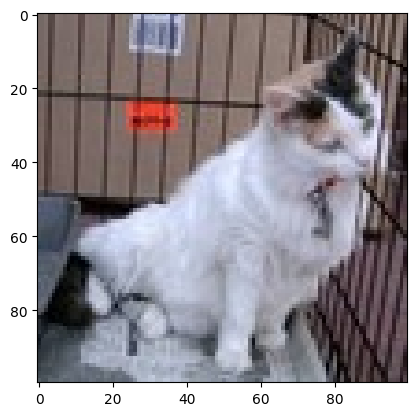

In [13]:
image = random.randint(0, len(x_train))

plt.imshow(x_train[image, :])
plt.show()

# **Model Selection and Training**

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPool2D((2, 2)),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid'),

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compilation

In [15]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [70]:
# Fix your labels: map 0.00392157 to 1
y_train = (y_train > 0).astype(int)
y_test = (y_test > 0).astype(int)

In [71]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.5009 - loss: 1.2981
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.5272 - loss: 0.6912
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5610 - loss: 0.6877
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6022 - loss: 0.6697
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5994 - loss: 0.6715
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6449 - loss: 0.6405
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6242 - loss: 0.6369
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6660 - loss: 0.6203
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6715 - loss: 0.6121
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6508 - loss: 0.6191


In [72]:
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6817 - loss: 0.6203


[0.7221360802650452, 0.6100000143051147]

# Making Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


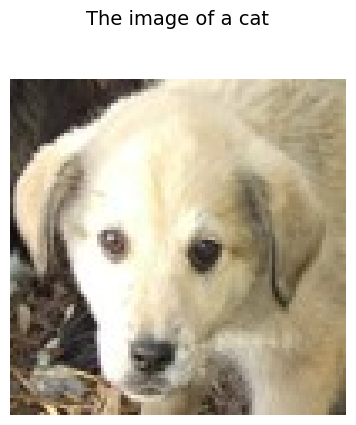

The image is a: cat


In [94]:
img = random.randint(0, len(y_test)-1)

# Predict the image

y_pred = model.predict(x_test[img, :].reshape(1, 100, 100, 3))
y_pred = (y_pred > 0.5)

# Label
pred = 'dog' if y_pred == 0 else 'cat'

# Show image

plt.figure(figsize=(4, 4))
plt.imshow(x_test[img, :])
plt.axis('off')  # Hide axes
plt.suptitle(f"The image of a {pred}", fontsize=14, y=1.05)  # Move title above image
plt.tight_layout()
plt.show()

# Also print result

print(f'The image is a: {pred}')

In [74]:
print("True label:", y_test[img])

True label: [0]


In [75]:
from sklearn.metrics import accuracy_score, classification_report
y_pred_all = model.predict(x_test)
y_pred_all = (y_pred_all > 0.5).astype(int)
y_test_int = y_test.astype(int)
print(classification_report(y_test_int, y_pred_all))

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
              precision    recall  f1-score   support

           0       0.59      0.71      0.65       200
           1       0.64      0.51      0.56       200

    accuracy                           0.61       400
   macro avg       0.62      0.61      0.61       400
weighted avg       0.62      0.61      0.61       400



In [76]:

print("Train labels:", np.unique(y_train, return_counts=True))
print("Test labels:", np.unique(y_test, return_counts=True))


Train labels: (array([0, 1]), array([1000, 1000]))
Test labels: (array([0, 1]), array([200, 200]))
